In [13]:
import torch
x = torch.ones(2,2,requires_grad=True)
print(x)

y = x + 2
print(y)
print(y.grad_fn)

z = y*y*3
out = z.mean()  #平均數
print(z,'z的平均數:',out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) z的平均數: tensor(27., grad_fn=<MeanBackward0>)


In [14]:
import torch

a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)  #'requires_grad_(...)' 改變當前變量是否求微分
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [15]:
import torch

out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [17]:
import torch

x = torch.randn(3,requires_grad=True)
y = x*2
while y.data.norm()<1000:
    y = y*2
    
print(y)

tensor([-603.8507,  881.7966,  180.7802], grad_fn=<MulBackward0>)


In [18]:
 import torch
 import numpy as np
 
 x = torch.randn(2, 2, requires_grad = True)
 
 # From numpy
 x = np.array([1., 2., 3.]) #Only Tensors of floating point dtype can require gradients
 x = torch.from_numpy(x)
 # Now enable gradient
 x.requires_grad_(True)
 # _ above makes the change in-place (its a common pytorch thing)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [23]:
import torch

tensor = torch.Tensor(2,5)
print(tensor,tensor.dtype)


a = tensor.long()
print(a,a.dtype)


b = tensor.half()
print(b,b.dtype)


c = tensor.int()
print(c)


d = tensor.float()
print(d)

tensor([[7.0773e-33, 4.5688e-41, 7.0773e-33, 4.5688e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 6.1949e-04, 1.0256e-08, 2.5783e-09]]) torch.float32
tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]) torch.int64
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0006, 0.0000, 0.0000]], dtype=torch.float16) torch.float16
tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)
tensor([[7.0773e-33, 4.5688e-41, 7.0773e-33, 4.5688e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 6.1949e-04, 1.0256e-08, 2.5783e-09]])


In [27]:
a=torch.Tensor([[[1,2,3],[4,5,6]]])
b=torch.Tensor([1,2,3,4,5,6])

print(a.view(3,2))  #用view()将tensor中的元素提取出来重新组合,可进行自我推断
print(b.view(1,6))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 2., 3., 4., 5., 6.]])


In [4]:
#coding=utf-8
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    #定义Net的初始化函数，这个函数定义了该神经网络的基本结构
    def __init__(self):
        super(Net, self).__init__() #复制并使用Net的父类的初始化方法，即先运行nn.Module的初始化函数
        self.conv1 = nn.Conv2d(1, 6, 5) # 定义conv1函数的是图像卷积函数：输入为图像（1个频道，即灰度图）,输出为 6张特征图, 卷积核为5x5正方形
        self.conv2 = nn.Conv2d(6, 16, 5)# 定义conv2函数的是图像卷积函数：输入为6张特征图,输出为16张特征图, 卷积核为5x5正方形
        self.fc1   = nn.Linear(16*5*5, 120) # 定义fc1（fullconnect）全连接函数1为线性函数：y = Wx + b，并将16*5*5个节点连接到120个节点上。
        self.fc2   = nn.Linear(120, 84)#定义fc2（fullconnect）全连接函数2为线性函数：y = Wx + b，并将120个节点连接到84个节点上。
        self.fc3   = nn.Linear(84, 10)#定义fc3（fullconnect）全连接函数3为线性函数：y = Wx + b，并将84个节点连接到10个节点上。

    #定义该神经网络的向前传播函数，该函数必须定义，一旦定义成功，向后传播函数也会自动生成（autograd）
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #输入x经过卷积conv1之后，经过激活函数ReLU，使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #输入x经过卷积conv2之后，经过激活函数ReLU，使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = x.view(-1, self.num_flat_features(x)) #view函数将张量x变形成一维的向量形式，总特征数并不改变，为接下来的全连接作准备。
        x = F.relu(self.fc1(x)) #输入x经过全连接1，再经过ReLU激活函数，然后更新x
        x = F.relu(self.fc2(x)) #输入x经过全连接2，再经过ReLU激活函数，然后更新x
        x = self.fc3(x) #输入x经过全连接3，然后更新x
        return x

    #使用num_flat_features函数计算张量x的总特征量（把每个数字都看出是一个特征，即特征总量），比如x是4*2*2的张量，那么它的特征总量就是16。
    def num_flat_features(self, x):
        size = x.size()[1:] 
        # 这里为什么要使用[1:],是因为pytorch只接受批输入，也就是说一次性输入好几张图片，那么输入数据张量的维度自然上升到了4维。【1:】让我们把注意力放在后3维上面
        #size()[1:]的代码意义是从列表1号位置开始选取
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
net


# 以下代码是为了看一下我们需要训练的参数的数量
print (net)
params = list(net.parameters())

k=0
for i in params:
    l =1
    print ("该层的结构："+str(list(i.size())))
    for j in i.size():
        l *= j
    print ("参数和："+str(l))
    k = k+l

print ("总参数和："+ str(k))


params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight




Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
该层的结构：[6, 1, 5, 5]
参数和：150
该层的结构：[6]
参数和：6
该层的结构：[16, 6, 5, 5]
参数和：2400
该层的结构：[16]
参数和：16
该层的结构：[120, 400]
参数和：48000
该层的结构：[120]
参数和：120
该层的结构：[84, 120]
参数和：10080
该层的结构：[84]
参数和：84
该层的结构：[10, 84]
参数和：840
该层的结构：[10]
参数和：10
总参数和：61706
10
torch.Size([6, 1, 5, 5])


TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not method

In [1]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

NameError: name 'net' is not defined

In [3]:
import torch
a = torch.rand(2,3)
b = torch.randn(2,3)

print(a)
print(b)

tensor([[0.1185, 0.0481, 0.9307],
        [0.2450, 0.7749, 0.3277]])
tensor([[-1.4702,  0.7769,  1.1958],
        [ 0.8010, -1.3025,  1.0181]])


In [5]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not method

In [2]:
import torch

x = torch.Tensor([1, 2, 3])
print(x.grad_fn)  # None  x的积分方法
print(x.requires_grad)  # False 属于x的属性 是否要积分

x.requires_grad_()  # 方法:为x赋值requires_grad为True
x = x + 1
print(x.grad_fn)  # <AddBackward0 object at 0x0000000002937EB8>
print(x.requires_grad)  # True

new_x = x.detach()
print(new_x.grad_fn)  # None
print(new_x.requires_grad)  # False detach()解绑 返回相同张量的值


None
False
True
None
False


In [13]:

import torch
a=torch.tensor([1.0])
b=a+1

a.requires_grad



False

In [2]:
import torch
import torch.nn as nn

x = torch.tensor([-4.5, 0.7, 3.3])
y = torch.tensor([1., 0., 1.])
h = nn.Sigmoid()
criterion = nn.BCELoss()
torch_nn_loss = criterion(h(x), y)
print('Logistic Regression Cross Entropy Loss use torch.nn: loss = {}'.format(torch_nn_loss.item()))

torch_loss = -(y * torch.log(torch.sigmoid(x)) + (1 - y) * torch.log(1 - torch.sigmoid(x))).mean()
print('Logistic Regression Cross Entropy Loss use torch: loss = {}'.format(torch_loss.item()))


Logistic Regression Cross Entropy Loss use torch.nn: loss = 1.8834843635559082
Logistic Regression Cross Entropy Loss use torch: loss = 1.8834843635559082


In [9]:
import torch
# w = torch.Tensor(3,5)
# nn.init.uniform(w)
# nn.init.normal(w)
# nn.init.constant(w)
# nn.init.eye(w)

# h = torch.Tensor(3,16,5,5)
# nn.init.dirac(h)

a = torch.randn(1,2,3,4,5)
torch.numel(a)

120

In [11]:
torch.eye(3)
torch.eye(4,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])

In [5]:
import numpy as np
import torch
a = np.array([1,2,3])
t = torch.from_numpy(a)
t

tensor([1, 2, 3])

In [19]:
#pytoch 数据指令

import torch
torch.linspace(-10,10,steps=5)  #-10到10五均分
torch.logspace(-10,10,5)  #-10到10五均分科学计数
torch.ones(2,3)  #两行三列元素为一
torch.ones(5)  #五行一列元素为一
torch.rand(5)  #[0,1)区间
torch.randn(5)  #标准正态分布
torch.randperm(6)  #0到5到随机排列(0到(n-1))
torch.arange(1,5,0.1)  #返回(5-1)/0.1间隔0.1到数列,默认1步长
torch.zeros(2,3)



tensor([[0., 0., 0.],
        [0., 0., 0.]])

#pytoch




In [29]:
#pytoch 数据操作,切片索引连接换位

import torch
x=torch.randn(2,3)

a=torch.cat((x,x,x),0)
print('a=',a)
b=torch.cat((x,x,x),1)
print('b=',b)
c=view(x)
print('c=',c)

a= tensor([[-0.6730,  1.1329, -1.1450],
        [-0.6268,  0.0205,  2.0526],
        [-0.6730,  1.1329, -1.1450],
        [-0.6268,  0.0205,  2.0526],
        [-0.6730,  1.1329, -1.1450],
        [-0.6268,  0.0205,  2.0526]])
b= tensor([[-0.6730,  1.1329, -1.1450, -0.6730,  1.1329, -1.1450, -0.6730,  1.1329,
         -1.1450],
        [-0.6268,  0.0205,  2.0526, -0.6268,  0.0205,  2.0526, -0.6268,  0.0205,
          2.0526]])


NameError: name 'view' is not defined

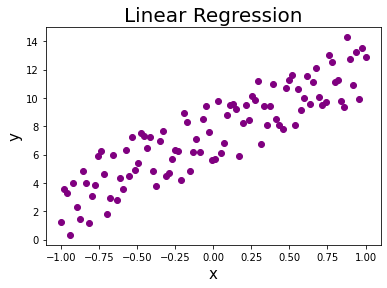

NameError: name 'net' is not defined

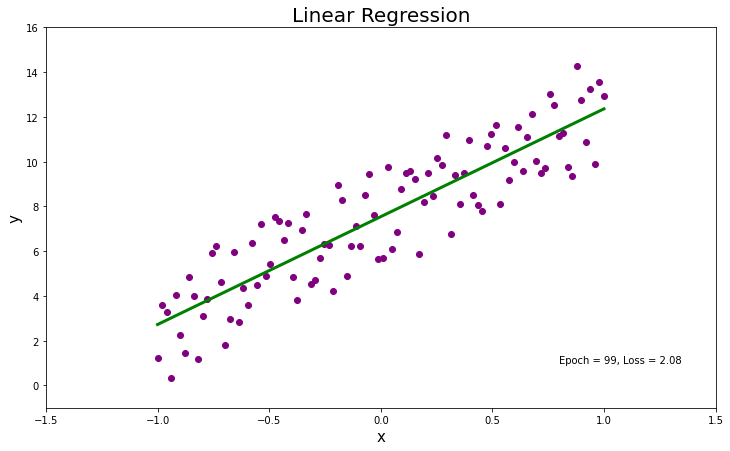

In [9]:
#线性回归案例

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from PIL import Image

# Create data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
noise = 5 * torch.rand(x.size())  
bias = 5 * torch.ones(x.size())
y = bias + 5 * x + noise

# View data   
plt.title('Linear Regression', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(x.data.numpy(), y.data.numpy(), color = "purple")
plt.show()

# Create model
linear_regression = nn.Linear(1, 1)

# Start training
optimizer = optim.SGD(linear_regression.parameters(), lr=0.2)
criterion = nn.MSELoss() 
fig, ax = plt.subplots(figsize=(12,7))
images_list = []

for epoch in range(100):
    y_pred = linear_regression(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



# plot and show learning process
    plt.cla()
    ax.set_title('Linear Regression', fontsize=20)
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.0, 16.0)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "purple")
    ax.plot(x.data.numpy(), y_pred.data.numpy(), 'g-', lw=3)
    ax.text(0.8, 1.0, 
            'Epoch = {}, Loss = {:.2f}'.format(epoch, loss.data.numpy()), 
            fontdict={'size': 10, 'color': 'black'})
    fig.canvas.draw()     
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img = Image.fromarray(img)
    images_list.append(img)
            
# save images as a gif    
images_list[0].save('./linear_regression.gif',
                    save_all=True, 
                    append_images=images_list[1:], 
                    optimize=False, 
                    duration=100, 
                    loop=0)

output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

SyntaxError: invalid character in identifier (<ipython-input-1-eda641a0d034>, line 78)

TypeError: new() received an invalid combination of arguments - got (Tensor, requires_grad=bool), but expected one of:
 * (*, torch.device device)
      didn't match because some of the keywords were incorrect: requires_grad
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device)
 * (object data, *, torch.device device)


NameError: name 'net' is not defined

In [10]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

NameError: name 'net' is not defined

In [1]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'trainloader' is not defined

In [3]:
import torch
import numpy as np
 
x1 = torch.from_numpy( 2*np.ones((2, 2), dtype=np.float32) )
x1.requires_grad_(True)
w1 = torch.from_numpy( 5*np.ones((2, 2), dtype=np.float32) )
w1.requires_grad_(True)
print("x1 =", x1)
print("w1 =", w1)
 
x2 = x1 * w1
w2 = torch.from_numpy( 6*np.ones((2,2), dtype=np.float32) )
w2.requires_grad_(True)
print("x2 =", x2)
print("w2 =", w2)
 
y = x2 * w2
Y = torch.from_numpy( 10*np.ones((2,2), dtype=np.float32) )
print("y =", y)
print("Y =", Y)
 
L = Y - y
print("L =", L)


L.backward(torch.ones(2, 2, dtype=torch.float))
 
print("x1.grad =", x1.grad)
print("w1.grad =", w1.grad)
print("w2.grad =", w2.grad)
 
L2 = x1 * x1
 
L2.backward(torch.ones(2, 2, dtype=torch.float))

print("x1.grad =", x1.grad)

x1 = tensor([[2., 2.],
        [2., 2.]], requires_grad=True)
w1 = tensor([[5., 5.],
        [5., 5.]], requires_grad=True)
x2 = tensor([[10., 10.],
        [10., 10.]], grad_fn=<MulBackward0>)
w2 = tensor([[6., 6.],
        [6., 6.]], requires_grad=True)
y = tensor([[60., 60.],
        [60., 60.]], grad_fn=<MulBackward0>)
Y = tensor([[10., 10.],
        [10., 10.]])
L = tensor([[-50., -50.],
        [-50., -50.]], grad_fn=<SubBackward0>)
x1.grad = tensor([[-30., -30.],
        [-30., -30.]])
w1.grad = tensor([[-12., -12.],
        [-12., -12.]])
w2.grad = tensor([[-10., -10.],
        [-10., -10.]])
x1.grad = tensor([[-26., -26.],
        [-26., -26.]])
